In [ ]:
import kagglehub

kritikseth_fruit_and_vegetable_image_recognition_path = kagglehub.dataset_download(
    "kritikseth/fruit-and-vegetable-image-recognition"
)

print("Dataset: " + kritikseth_fruit_and_vegetable_image_recognition_path)

100%|██████████| 1.98G/1.98G [00:23<00:00, 92.5MB/s]

Extracting files...


Dataset: /root/.cache/kagglehub/datasets/kritikseth/fruit-and-vegetable-image-recognition/versions/8


In [ ]:
import warnings
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras

warnings.filterwarnings("ignore")

In [ ]:
dataset_path = Path(kritikseth_fruit_and_vegetable_image_recognition_path)

train_dir = dataset_path / "train"
test_dir = dataset_path / "test"
val_dir = dataset_path / "validation"

print(f"Train directory: {train_dir}")
print(f"Test directory: {test_dir}")
print(f"Validation directory: {val_dir}")

Train directory: /root/.cache/kagglehub/datasets/kritikseth/fruit-and-vegetable-image-recognition/versions/8/train
Test directory: /root/.cache/kagglehub/datasets/kritikseth/fruit-and-vegetable-image-recognition/versions/8/test
Validation directory: /root/.cache/kagglehub/datasets/kritikseth/fruit-and-vegetable-image-recognition/versions/8/validation


In [ ]:
train_filepaths = list(train_dir.glob(r"**/*.jpg"))
test_filepaths = list(test_dir.glob(r"**/*.jpg"))
val_filepaths = list(val_dir.glob(r"**/*.jpg"))


def proc_img(filepath):
    labels = [str(filepath[i]).split("/")[-2] for i in range(len(filepath))]

    filepath = pd.Series(filepath, name="Filepath").astype(str)
    labels = pd.Series(labels, name="Label")

    df = pd.concat([filepath, labels], axis=1)

    df = df.sample(frac=1, random_state=67).reset_index(drop=True)

    return df


train_df = proc_img(train_filepaths)
test_df = proc_img(test_filepaths)
val_df = proc_img(val_filepaths)

In [ ]:
print("--- Train DataFrame ---")
print(train_df.head())
print(f"Number of pictures: {train_df.shape[0]}\n")

print("\n--- Test DataFrame ---")
print(test_df.head())
print(f"Number of pictures: {test_df.shape[0]}\n")

print("\n--- Validate DataFrame ---")
print(val_df.head())
print(f"Number of pictures: {val_df.shape[0]}\n")

--- Train DataFrame ---
                                            Filepath          Label
0  /root/.cache/kagglehub/datasets/kritikseth/fru...        lettuce
1  /root/.cache/kagglehub/datasets/kritikseth/fru...         turnip
2  /root/.cache/kagglehub/datasets/kritikseth/fru...       capsicum
3  /root/.cache/kagglehub/datasets/kritikseth/fru...        spinach
4  /root/.cache/kagglehub/datasets/kritikseth/fru...  chilli pepper
Number of pictures: 2780


--- Test DataFrame ---
                                            Filepath    Label
0  /root/.cache/kagglehub/datasets/kritikseth/fru...  lettuce
1  /root/.cache/kagglehub/datasets/kritikseth/fru...  paprika
2  /root/.cache/kagglehub/datasets/kritikseth/fru...    apple
3  /root/.cache/kagglehub/datasets/kritikseth/fru...  paprika
4  /root/.cache/kagglehub/datasets/kritikseth/fru...   tomato
Number of pictures: 334


--- Validate DataFrame ---
                                            Filepath    Label
0  /root/.cache/kagglehub/datas

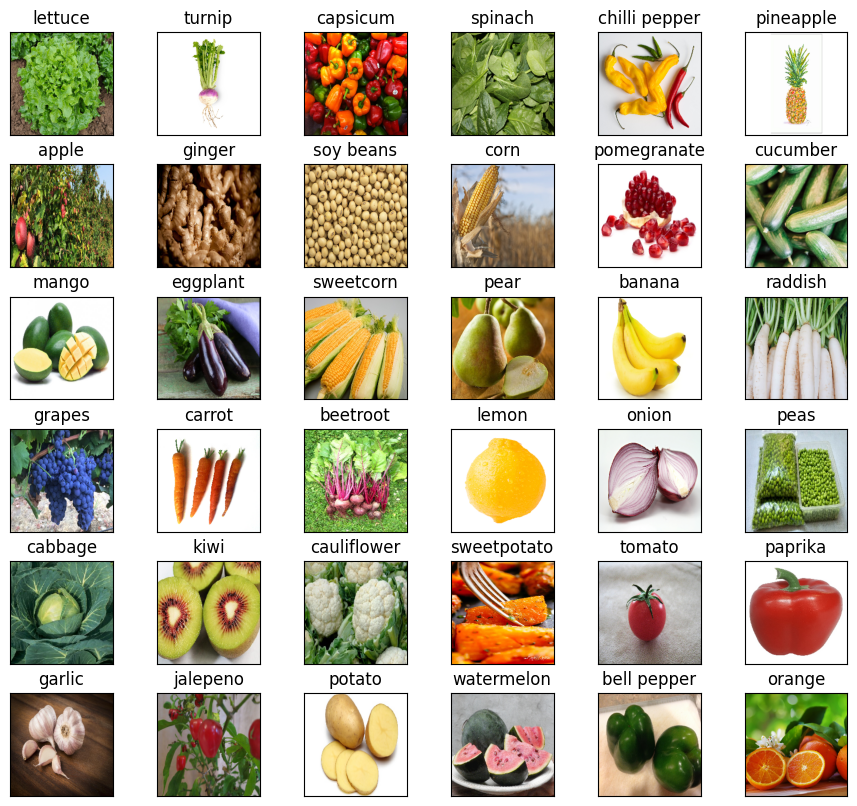

In [ ]:
# Create a DataFrame with one Label of each category
df_unique = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()

# Display some pictures of the dataset
fig, axes = plt.subplots(
    nrows=6, ncols=6, figsize=(9, 8), subplot_kw={"xticks": [], "yticks": []}
)

for i, ax in enumerate(axes.flat):
    img = keras.preprocessing.image.load_img(
        df_unique.Filepath[i], target_size=(224, 224)
    )

    ax.imshow(img)
    ax.set_title(df_unique.Label[i], fontsize=12)
plt.tight_layout(pad=0.5)
plt.show()

In [ ]:
train_generator_mobilenet = keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=keras.applications.mobilenet_v2.preprocess_input,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest",
    brightness_range=[0.8, 1.2],
)

test_generator_mobilenet = keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=keras.applications.mobilenet_v2.preprocess_input
)

train_images_mobilenet = train_generator_mobilenet.flow_from_dataframe(
    dataframe=train_df,
    x_col="Filepath",
    y_col="Label",
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    shuffle=True,
    seed=0,
)

val_images_mobilenet = test_generator_mobilenet.flow_from_dataframe(
    dataframe=val_df,
    x_col="Filepath",
    y_col="Label",
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    shuffle=False,
    seed=0,
)

test_images_mobilenet = test_generator_mobilenet.flow_from_dataframe(
    dataframe=test_df,
    x_col="Filepath",
    y_col="Label",
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    shuffle=False,
)

Found 2780 validated image filenames belonging to 36 classes.
Found 334 validated image filenames belonging to 36 classes.
Found 334 validated image filenames belonging to 36 classes.


In [ ]:
train_generator_efficientnet = keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=keras.applications.efficientnet_v2.preprocess_input,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest",
    brightness_range=[0.8, 1.2],
)

test_generator_efficientnet = keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=keras.applications.efficientnet_v2.preprocess_input
)

train_images_efficientnet = train_generator_efficientnet.flow_from_dataframe(
    dataframe=train_df,
    x_col="Filepath",
    y_col="Label",
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    shuffle=True,
    seed=0,
)

val_images_efficientnet = test_generator_efficientnet.flow_from_dataframe(
    dataframe=val_df,
    x_col="Filepath",
    y_col="Label",
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    shuffle=False,
    seed=0,
)

test_images_efficientnet = test_generator_efficientnet.flow_from_dataframe(
    dataframe=test_df,
    x_col="Filepath",
    y_col="Label",
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    shuffle=False,
)

Found 2780 validated image filenames belonging to 36 classes.
Found 334 validated image filenames belonging to 36 classes.
Found 334 validated image filenames belonging to 36 classes.


In [ ]:
def summarize_diagnostics(history, title):
    plt.figure(figsize=(10, 5))
    # Plot loss
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, plot 1
    plt.title(f"{title} - Cross Entropy Loss")
    plt.plot(history.history["loss"], color="blue", label="train")
    plt.plot(history.history["val_loss"], color="orange", label="validation")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, plot 2
    plt.title(f"{title} - Classification Accuracy")
    plt.plot(history.history["accuracy"], color="blue", label="train")
    plt.plot(history.history["val_accuracy"], color="orange", label="validation")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
def define_mobilenet_model():
    # Load the pretained model
    pretrained_model = keras.applications.MobileNetV2(
        input_shape=(224, 224, 3),
        include_top=False,
        # weights='imagenet',
        pooling="avg",
    )

    pretrained_model.trainable = False

    # New classification head
    inputs = pretrained_model.input

    x = keras.layers.Dense(128, activation="relu")(pretrained_model.output)
    x = keras.layers.Dense(128, activation="relu")(x)

    outputs = keras.layers.Dense(36, activation="softmax")(x)

    mobilenet_model = keras.Model(inputs=inputs, outputs=outputs)

    mobilenet_model.compile(
        optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
    )

    return mobilenet_model


def train_mobilenet_model():
    mobilenet_model = define_mobilenet_model()
    history = mobilenet_model.fit(
        train_images_mobilenet,
        validation_data=val_images_mobilenet,
        epochs=50,
        callbacks=[
            keras.callbacks.EarlyStopping(
                monitor="val_loss", patience=6, restore_best_weights=True
            )
        ],
    )
    return mobilenet_model, history


mobilenet_model, mobilenet_history = train_mobilenet_model()

Epoch 1/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 123s 1s/step - accuracy: 0.3038 - loss: 2.7493 - val_accuracy: 0.8054 - val_loss: 0.6258
Epoch 2/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 127s 1s/step - accuracy: 0.7410 - loss: 0.8299 - val_accuracy: 0.8713 - val_loss: 0.4158
Epoch 3/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - accuracy: 0.8070 - loss: 0.6068 - val_accuracy: 0.8802 - val_loss: 0.3323
Epoch 4/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.8451 - loss: 0.4845 - val_accuracy: 0.8922 - val_loss: 0.2824
Epoch 5/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.8768 - loss: 0.3948 - val_accuracy: 0.9042 - val_loss: 0.2697
Epoch 6/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step - accuracy: 0.8790 - loss: 0.3730 - val_accuracy: 0.9102 - val_loss: 0.2496
Epoch 7/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.8945 - loss: 0.3112 - val_accuracy: 0.9042 - val_loss: 0.2405
Epoch 8/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step - accuracy: 0.9106 - loss: 0.2750 - val_accuracy: 0.9251 - v

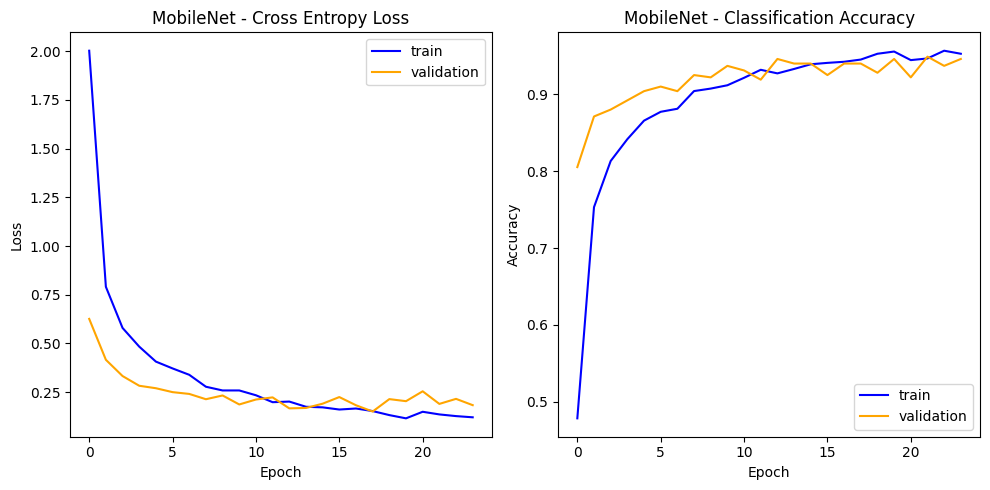

In [ ]:
summarize_diagnostics(mobilenet_history, "MobileNet")

In [ ]:
mobilenet_model.save("mobilenet_model.keras")

In [ ]:
def define_efficientnet_model():
    # Load the pretained EfficientNetB0 model
    efficientnet_model = keras.applications.EfficientNetV2B0(
        input_shape=(224, 224, 3),
        include_top=False,
        # weights='imagenet',
        pooling="avg",
    )
    efficientnet_model.trainable = False

    # Build the new model on top of EfficientNetB0
    inputs = efficientnet_model.input

    x = keras.layers.Dense(128, activation="relu")(efficientnet_model.output)
    x = keras.layers.Dropout(0.3)(x)  # Added dropout for regularization
    x = keras.layers.Dense(128, activation="relu")(x)
    x = keras.layers.Dropout(0.3)(x)  # Added dropout for regularization

    outputs = keras.layers.Dense(36, activation="softmax")(
        x
    )  # 36 classes for fruits/vegetables

    efficientnet_model = keras.Model(inputs=inputs, outputs=outputs)

    efficientnet_model.compile(
        optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
    )

    return efficientnet_model


def train_efficientnet_model():
    # Train the EfficientNetB0 model
    efficientnet_model = define_efficientnet_model()

    efficientnet_history = efficientnet_model.fit(
        train_images_efficientnet,
        validation_data=val_images_efficientnet,
        epochs=50,
        callbacks=[
            keras.callbacks.EarlyStopping(
                monitor="val_loss", patience=6, restore_best_weights=True
            )
        ],
    )

    return efficientnet_model, efficientnet_history


efficientnet_model, efficientnet_history = train_efficientnet_model()

24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 187s 2s/step - accuracy: 0.2022 - loss: 3.0996 - val_accuracy: 0.7425 - val_loss: 0.9159
Epoch 2/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step - accuracy: 0.6266 - loss: 1.3581 - val_accuracy: 0.8443 - val_loss: 0.4917
Epoch 3/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step - accuracy: 0.7032 - loss: 0.9765 - val_accuracy: 0.8623 - val_loss: 0.3671
Epoch 4/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 113s 1s/step - accuracy: 0.7544 - loss: 0.7668 - val_accuracy: 0.8743 - val_loss: 0.3308
Epoch 5/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - accuracy: 0.7879 - loss: 0.6557 - val_accuracy: 0.8892 - val_loss: 0.2897
Epoch 6/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.8046 - loss: 0.6220 - val_accuracy: 0.8832 - val_loss: 0.2963
Epoch 7/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.8156 - loss: 0.5573 - val_accuracy: 0.8862 - val_loss: 0.2458
Epoch 8/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accurac

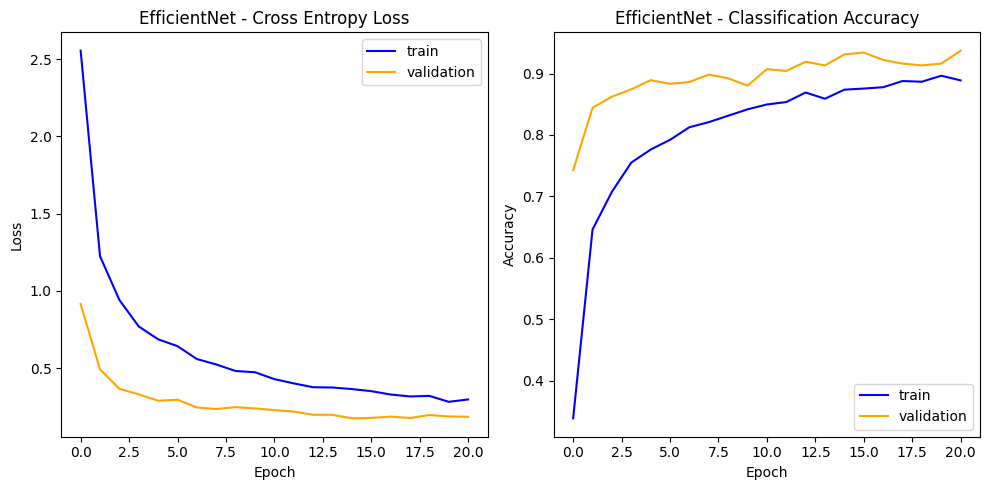

In [ ]:
summarize_diagnostics(efficientnet_history, "EfficientNet")

In [ ]:
efficientnet_model.save("efficientnet_model.keras")